### Importing Libraries

In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text Preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt') # Tokenization
nltk.download('wordnet') # Lemmatization

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer # Text Vectoization

# For Model Building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utsav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utsav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [6]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

### Data Visualization

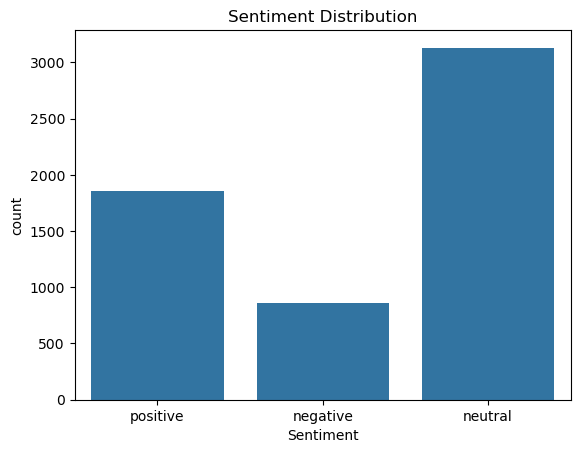

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


In [7]:
sns.countplot(x=df.Sentiment)
plt.title('Sentiment Distribution')
plt.show()

print(df.Sentiment.value_counts())

In [8]:
print("No. of Duplicates: ",df.duplicated().sum())

No. of Duplicates:  6


In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
print("No. of Duplicates: ",df.duplicated().sum())

No. of Duplicates:  0


In [11]:
df.Sentiment.value_counts()

Sentiment
neutral     3124
positive    1852
negative     860
Name: count, dtype: int64

### Text Preprocessing

In [12]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stems = [stemmer.stem(token) for token in tokens]
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return stems, lemmas

df['tokens'], df['lemmas'] = zip(*df['Sentence'].apply(preprocess_text))

In [13]:
df.head()

,Sentence,Sentiment,tokens,lemmas
0,The GeoSolutions technology will leverage Bene...,positive,"[the, geosolut, technolog, will, leverag, bene...","[The, GeoSolutions, technology, will, leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"[$, esi, on, low, ,, down, $, 1.50, to, $, 2.5...","[$, ESI, on, low, ,, down, $, 1.50, to, $, 2.5..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"[for, the, last, quarter, of, 2010, ,, compone...","[For, the, last, quarter, of, 2010, ,, Compone..."
3,According to the Finnish-Russian Chamber of Co...,neutral,"[accord, to, the, finnish-russian, chamber, of...","[According, to, the, Finnish-Russian, Chamber,..."
4,The Swedish buyout firm has sold its remaining...,neutral,"[the, swedish, buyout, firm, ha, sold, it, rem...","[The, Swedish, buyout, firm, ha, sold, it, rem..."


### Text Analysis

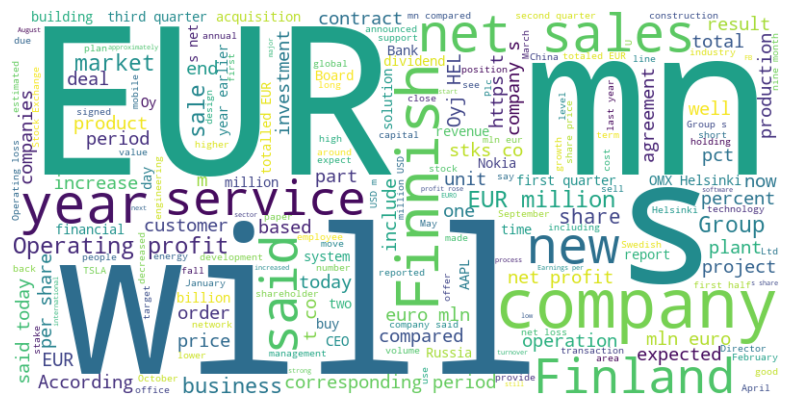

In [14]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(' '.join(df['Sentence']))

### Text Vectorization

In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Sentence'])

In [16]:
X

<5836x11381 sparse matrix of type '<class 'numpy.float64'>'
	with 97057 stored elements in Compressed Sparse Row format>

In [17]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Model Building

In [18]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, df['Sentiment'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Model Evaluation

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.82      0.80      0.81       623
     neutral       0.71      0.77      0.74       642
    positive       0.90      0.84      0.87       610

    accuracy                           0.80      1875
   macro avg       0.81      0.80      0.81      1875
weighted avg       0.81      0.80      0.80      1875



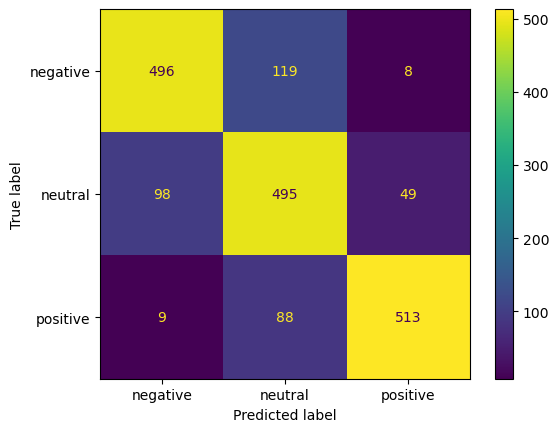

In [22]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))